# Attempt at Predicting Property Sales in Queens, New York

### Backstory
My family has been long obsessed with the idea of owning property and getting set up for retirement. Areas that my parents and grandparents generally looked at were areas of high diversity and locations where many of their friends were close by. One protentional area they had considered was in Queens, New York. I want to find out if they were to invest in housing Queens, where should they buy one and how easily would they be able to sell it if they decided to go elsewhere. 

### Libraries Needed
- BeautifulSoup - to scrape website
- GeoPandas - to help represent data visually on a map
- Matplotlib - to create plots
- Numpy - to manipulate number data
- Pandas - to load and modify large data sets
- Requests - to help parse website 
- Seaborn - to do statistical analysis

In [358]:
!pip install geopandas

from bs4 import BeautifulSoup as bs
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests as re
import seaborn as sns

### Property Data
Unfortunately, the data available to me on the topic was rather limited. Data from the official NYC government site were far too large to me to be able to open and load so looking around, I only managed to find data from 2005-2009. The data was downloaded from [data.gov](https://catalog.data.gov/dataset?q=Summary+of+Neighborhood+Sales+for+Queens&as_sfid=AAAAAAX1aTcL_dTLlWLD69I2ZrQhG5DeLLi-Rciu0eK3gTdzSTTd9zcm9YypC4hbJTs_BBHFR4LKlxINv8KvGv2thiC3_qaEyhYdozu40X7vkjoxL5wHk8a6gdWOjky49KUKvDg%3D&as_fid=b9d75d678b79b72a1d8bb9d04356231f210c5ac0), years 2005-2009.

- NEIGHBORHOOD - area of which the house is location
- TYPE OF HOME - defines the condition of the house sold, 
    - 01 being ready to move in
    - 02 being needs a bit of touching up
    - 03 being a lot of work is needed
- NUMBER OF SALES - sales made in given neighborhood
- LOWEST SALE PRICE - lowest price of house sold in given sales
- AVERAGE SALE PRICE - average price sold in given sales
- MEDIAN SALE PRICE	- medium price sold in given sales
- HIGHEST SALE PRICE - highest price sold in given sales

In [393]:
p2005 = pd.read_csv("./2005.csv")
p2006 = pd.read_csv("./2006.csv")
p2007 = pd.read_csv("./2007.csv")
p2008 = pd.read_csv("./2008.csv")
p2009 = pd.read_csv("./2009.csv")
p2005

,NEIGHBORHOOD,TYPE OF HOME,NUMBER OF SALES,LOWEST SALE PRICE,AVERAGE SALE PRICE,MEDIAN SALE PRICE,HIGHEST SALE PRICE
0,AIRPORT LA GUARDIA,01 ONE FAMILY HOMES,6,178750.0,445958.0,490000.0,530000.0
1,AIRPORT LA GUARDIA,02 TWO FAMILY HOMES,2,475000.0,507500.0,507500.0,540000.0
2,AIRPORT LA GUARDIA,03 THREE FAMILY HOMES,1,745000.0,745000.0,745000.0,745000.0
3,ARVERNE,01 ONE FAMILY HOMES,87,160000.0,305615.0,295000.0,700000.0
4,ARVERNE,02 TWO FAMILY HOMES,180,150000.0,414127.0,417500.0,540000.0
...,...,...,...,...,...,...,...
158,WOODHAVEN,02 TWO FAMILY HOMES,326,200000.0,551341.0,550525.0,920000.0
159,WOODHAVEN,03 THREE FAMILY HOMES,44,400000.0,579743.0,577350.0,745000.0
160,WOODSIDE,01 ONE FAMILY HOMES,49,230000.0,509210.0,490000.0,840000.0
161,WOODSIDE,02 TWO FAMILY HOMES,81,255000.0,677535.0,670000.0,995000.0


### Tidying Data
We first want to make sure the data is sorted in some ways, in this instance, we want to group the data up by their neighborhoods. Since we don’t want to go through each data set and confirm them ourselves, we take the instance of unique neighborhood values and loop through one of them to make sure they all have the same defined neighborhoods. We do this so that the data we look at later won’t be bias in the instance there are missing data for some neighborhood.

Afterwards we want to start combing all the data sets based on their neighborhood, in this instance we are interested in the number of sales made in a neighborhood and the average sale price. We go through each dataset and populate dictionaries to save the values for later use. 

In [431]:
neighborhoods5 = p2005['NEIGHBORHOOD'].unique()
neighborhoods6 = p2006['NEIGHBORHOOD'].unique()
neighborhoods7 = p2007['NEIGHBORHOOD'].unique()
neighborhoods8 = p2008['NEIGHBORHOOD'].unique()
neighborhoods9 = p2009['NEIGHBORHOOD'].unique()

for n in neighborhoods5:
    if n in neighborhoods6 and n in neighborhoods7 and n in neighborhoods8  and n in neighborhoods9:
        continue
    else:
        print(n)

p2005['NEIGHBORHOOD'] = p2005['NEIGHBORHOOD'].str.strip()        
p2006['NEIGHBORHOOD'] = p2006['NEIGHBORHOOD'].str.strip()
p2007['NEIGHBORHOOD'] = p2007['NEIGHBORHOOD'].str.strip()
p2008['NEIGHBORHOOD'] = p2009['NEIGHBORHOOD'].str.strip()
p2009['NEIGHBORHOOD'] = p2009['NEIGHBORHOOD'].str.strip()

sales_dict = {}
average_cost_dict = {}
instance_dict = {}

for n in neighborhoods9:
    sales_dict[n] = 0
    average_cost_dict[n] = 0
    instance_dict[n] = 0
    
for i, row in p2005.iterrows():
    sales_dict[row['NEIGHBORHOOD']] += row["NUMBER OF SALES"]
    average_cost_dict[row['NEIGHBORHOOD']] += row["AVERAGE SALE PRICE"]

for i, row in p2006.iterrows():
    sales_dict[row['NEIGHBORHOOD']] += row["NUMBER OF SALES"]
    average_cost_dict[row['NEIGHBORHOOD']] += row["AVERAGE SALE PRICE"]
        
for i, row in p2007.iterrows():
    sales_dict[row['NEIGHBORHOOD']] += row["NUMBER OF SALES"]
    average_cost_dict[row['NEIGHBORHOOD']] += row["AVERAGE SALE PRICE"]
        
for i, row in p2008.iterrows():
    sales_dict[row['NEIGHBORHOOD']] += row["NUMBER OF SALES"]
    average_cost_dict[row['NEIGHBORHOOD']] += row["AVERAGE SALE PRICE"]
        
for i, row in p2009.iterrows():
    sales_dict[row['NEIGHBORHOOD']] += row["NUMBER OF SALES"]
    average_cost_dict[row['NEIGHBORHOOD']] += row["AVERAGE SALE PRICE"]

We see that no neighborhood values were printed so that means that neighborhoods across all five of the data sets were identical so we move on to making the data more consistent.

Because the added the averages of sale prices across five data sets, we need to accommodate for it by dividing the value of each instance by their appearance in the datasets to get a more accurate average.

In [432]:
nb_names = p2005['NEIGHBORHOOD']

for n in nb_names:
    instance_dict[n] += 1
  
for n in average_cost_dict.keys():
    average_cost_dict[n] = average_cost_dict[n] / (instance_dict[n] * 5)
    
average_cost_dict

{'AIRPORT LA GUARDIA': 370430.5333333333,
 'ARVERNE': 420323.86666666664,
 'ASTORIA': 698340.8,
 'BAYSIDE': 754755.0666666667,
 'BEECHHURST': 943957.1,
 'BELLE HARBOR': 688217.2666666667,
 'BELLEROSE': 524926.6,
 'BRIARWOOD': 635507.6666666666,
 'BROAD CHANNEL': 418014.1,
 'CAMBRIA HEIGHTS': 471237.5,
 'COLLEGE POINT': 615367.1333333333,
 'CORONA': 639388.2666666667,
 'DOUGLASTON': 923652.6,
 'EAST ELMHURST': 610384.4666666667,
 'ELMHURST': 677072.0666666667,
 'FAR ROCKAWAY': 492061.6666666667,
 'FLORAL PARK': 733184.8,
 'FLUSHING-NORTH': 733855.0,
 'FLUSHING-SOUTH': 669312.3333333334,
 'FOREST HILLS': 857045.6,
 'FRESH MEADOWS': 845973.2,
 'GLEN OAKS': 438403.86666666664,
 'GLENDALE': 566777.3333333334,
 'HAMMELS': 431111.93333333335,
 'HILLCREST': 408465.26666666666,
 'HOLLIS': 561390.6,
 'HOLLIS HILLS': 729342.8,
 'HOLLISWOOD': 559349.4,
 'HOWARD BEACH': 606967.6,
 'JACKSON HEIGHTS': 644657.2,
 'JAMAICA': 581149.0,
 'JAMAICA BAY': 328160.2,
 'JAMAICA ESTATES': 816714.4,
 'JAMAICA HI

### Visual Map Data
We want to create a way for us to be able tell the most significant values by simply looking at it as looking at the dictionaries we generated are rather time consuming. To do this  we load in the shapes of neighborhoods for a geo-dataset obtained from [NYC government site]( https://www1.nyc.gov/site/planning/data-maps/open-data/bytes-archive.page?sorts[year]=0&queries[search]=Neighborhood), Neighborhood Tabulation Areas - Shapefile 2020, 20A

From this data set we only want neighborhoods in Queens and we only want to keep columns:
- NTAName - neighborhood
- geometry - gives us the shapes of neighborhood

In [433]:
nb_data = gpd.read_file("./nynta.shp")
nb_data

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry
0,3,Brooklyn,047,BK88,Borough Park,39247.227831,5.400502e+07,"POLYGON ((990897.900 169268.121, 990588.252 16..."
1,4,Queens,081,QN51,Murray Hill,33266.904797,5.248828e+07,"POLYGON ((1038593.459 221913.355, 1039369.281 ..."
2,4,Queens,081,QN27,East Elmhurst,19816.711908,1.972685e+07,"POLYGON ((1022728.275 217530.808, 1023052.645 ..."
3,4,Queens,081,QN07,Hollis,20976.335574,2.288777e+07,"POLYGON ((1051539.660 201007.013, 1051920.726 ..."
4,1,Manhattan,061,MN06,Manhattanville,17040.685413,1.064708e+07,"POLYGON ((999174.261 238490.105, 999084.570 23..."
...,...,...,...,...,...,...,...,...
190,2,Bronx,005,BX01,Claremont-Bathgate,30050.115557,1.645395e+07,"POLYGON ((1014572.350 250682.762, 1014489.296 ..."
191,2,Bronx,005,BX14,East Concourse-Concourse Village,27199.911998,1.822164e+07,"POLYGON ((1009266.029 246329.172, 1009255.956 ..."
192,2,Bronx,005,BX99,park-cemetery-etc-Bronx,223439.425999,2.208390e+08,"MULTIPOLYGON (((1020356.163 236653.068, 102035..."
193,4,Queens,081,QN35,Briarwood-Jamaica Hills,30029.287357,2.937737e+07,"POLYGON ((1041627.321 198275.486, 1041389.733 ..."


### Addressing Consistencies in Data Sets
After dropping data that we don’t use, we still to make sure that the neighborhood values in the geo-map data set matches the one from the dataset with property and sales data. Simply from glance, we can tell that there are some major differences in names. For this project we are just going to take the intersections of names rather than trying to puzzle together which neighborhood we should merge together. 
-  there seems to be East and West Flushing in property data set but not in the mapping data set, since we are unsure of how to merge the two visually, we leave those alone
-  we also see the vice versa where a single neighborhood for is provided in the property data set but it’s mapping is split into more than 2 neighborhoods
- we also have data data isn’t as clearly named as we would like, in the mapping section, we have an area called “airport”, using a quick Google search, we see that there are 2 major airports in Queens so we do not want to mess with that data either

In the end, I think would be best to just consider data with exact matching neighborhood names. This however will affect the outcome since a portion of the data is missing but we push onwards while and remember this while analyzing the results.

In [434]:
to_drop = nb_data[nb_data["BoroName"] != "Queens"].index 
nb_data.drop(to_drop, inplace=True) # removes all Boro that isn't Queens

# removes all other columns that we don't really care for
nb_data = nb_data.drop(columns=["BoroCode", "BoroName", "CountyFIPS", "NTACode", "Shape_Leng", "Shape_Area"])

nb_data['NTAName'].unique()

array(['Murray Hill', 'East Elmhurst', 'Hollis', 'Fresh Meadows-Utopia',
       'St. Albans', 'Jamaica Estates-Holliswood', 'Jamaica',
       'South Jamaica', 'Cambria Heights', 'Ridgewood',
       'Queensbridge-Ravenswood-Long Island City', 'Glendale',
       'Pomonok-Flushing Heights-Hillcrest', 'Queens Village',
       'Bellerose', 'Middle Village', 'Elmhurst', 'Laurelton',
       'South Ozone Park', 'Maspeth', 'Elmhurst-Maspeth', 'College Point',
       'Richmond Hill', 'Woodhaven',
       'Glen Oaks-Floral Park-New Hyde Park',
       'Douglas Manor-Douglaston-Little Neck', 'Auburndale',
       'East Flushing',
       'Breezy Point-Belle Harbor-Rockaway Park-Broad Channel',
       'Hammels-Arverne-Edgemere', 'Springfield Gardens South-Brookville',
       'Rosedale', 'Far Rockaway-Bayswater', 'Astoria',
       'Bayside-Bayside Hills', 'Hunters Point-Sunnyside-West Maspeth',
       'Old Astoria', 'Steinway', 'Airport',
       'Ft. Totten-Bay Terrace-Clearview', 'Flushing', 'Whiteston

### Comparing Sales to Average Property Value
Using the dictionaries that we generated from tidying the data, we generate and add a new column to the data that was import for the geo-mapping data set of the neighborhoods. From here we generate a map of each neighborhood and its total sales for the years 2005-2009. 

We see that a majority of the sales that occurred took place in Southern Queens. We are now interested in the general cost of property in these areas and generate a similar map to show case cost for each neighborhood.

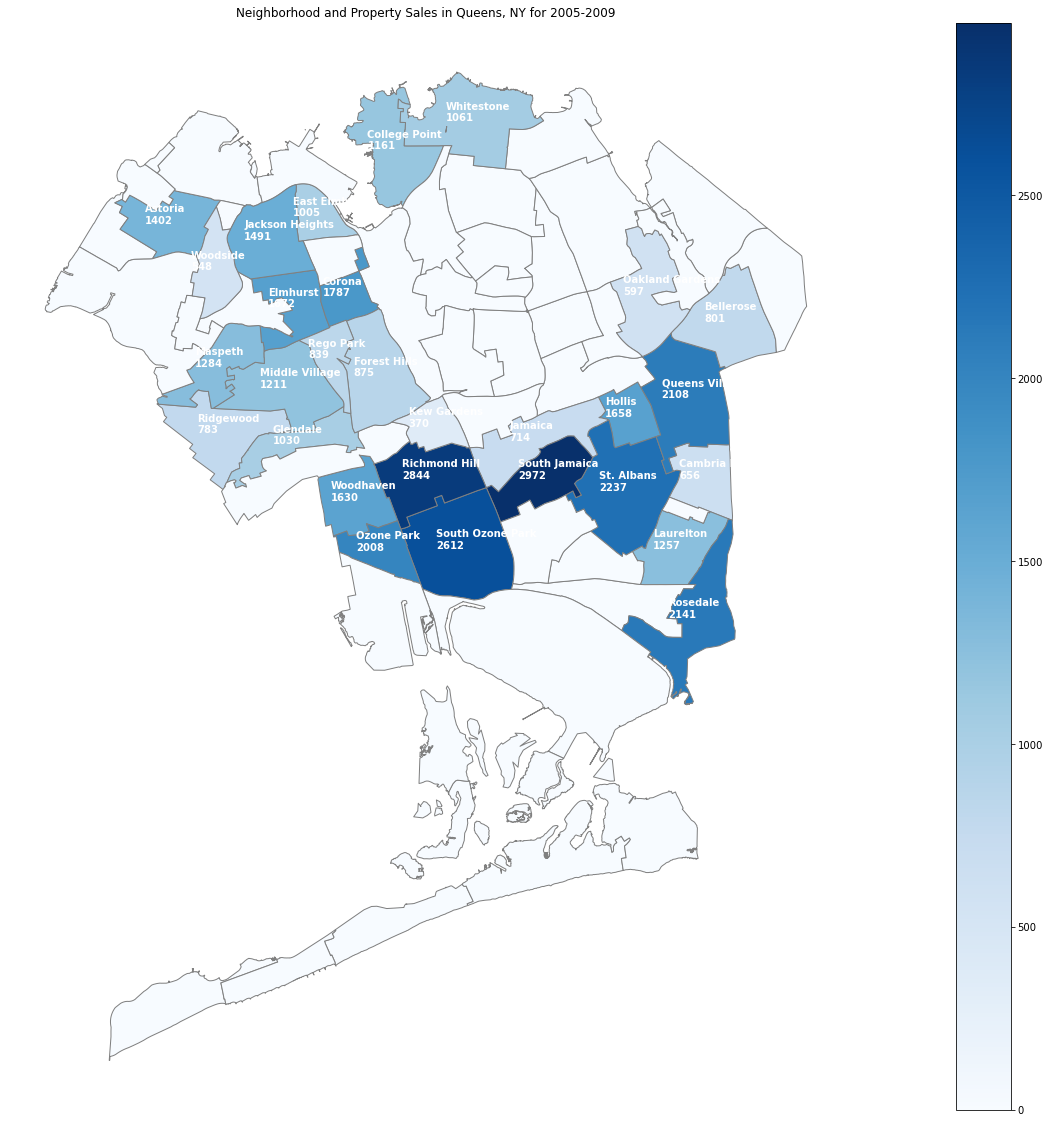

In [435]:
nb_data['sales'] = 0

# adding sales data to overall df
for i, row in nb_data.iterrows():
    if row['NTAName'].upper() in sales_dict:
        nb_data.at[i, 'sales'] = sales_dict[row['NTAName'].upper()]
        
nb_map = nb_data.plot(column='sales', k=8, cmap='Blues', figsize=(40,20), linewidth=1, edgecolor='0.5', legend=True)

for i, row in nb_data.iterrows():
    if row['NTAName'].upper() in sales_dict:
        x = row['geometry'].centroid.x
        y = row['geometry'].centroid.y
        label = row['NTAName'] + "\n" + str(row['sales'])
        nb_map.annotate(label, xy=(x, y), xytext=(-25, 0), color="white", textcoords="offset points", fontsize=10, weight="bold")

nb_map.set(title="Neighborhood and Property Sales in Queens, NY for 2005-2009")
nb_map.set_axis_off()


Looking at these two maps, we see that most property sales take place in areas where the average cost of the property seems to be between 450K to 550k. We now assume that if we look at the prices of property that are between 450k and 550k, we can then predict how likely the property would sale. We would like to do this as a function of which year it is. 

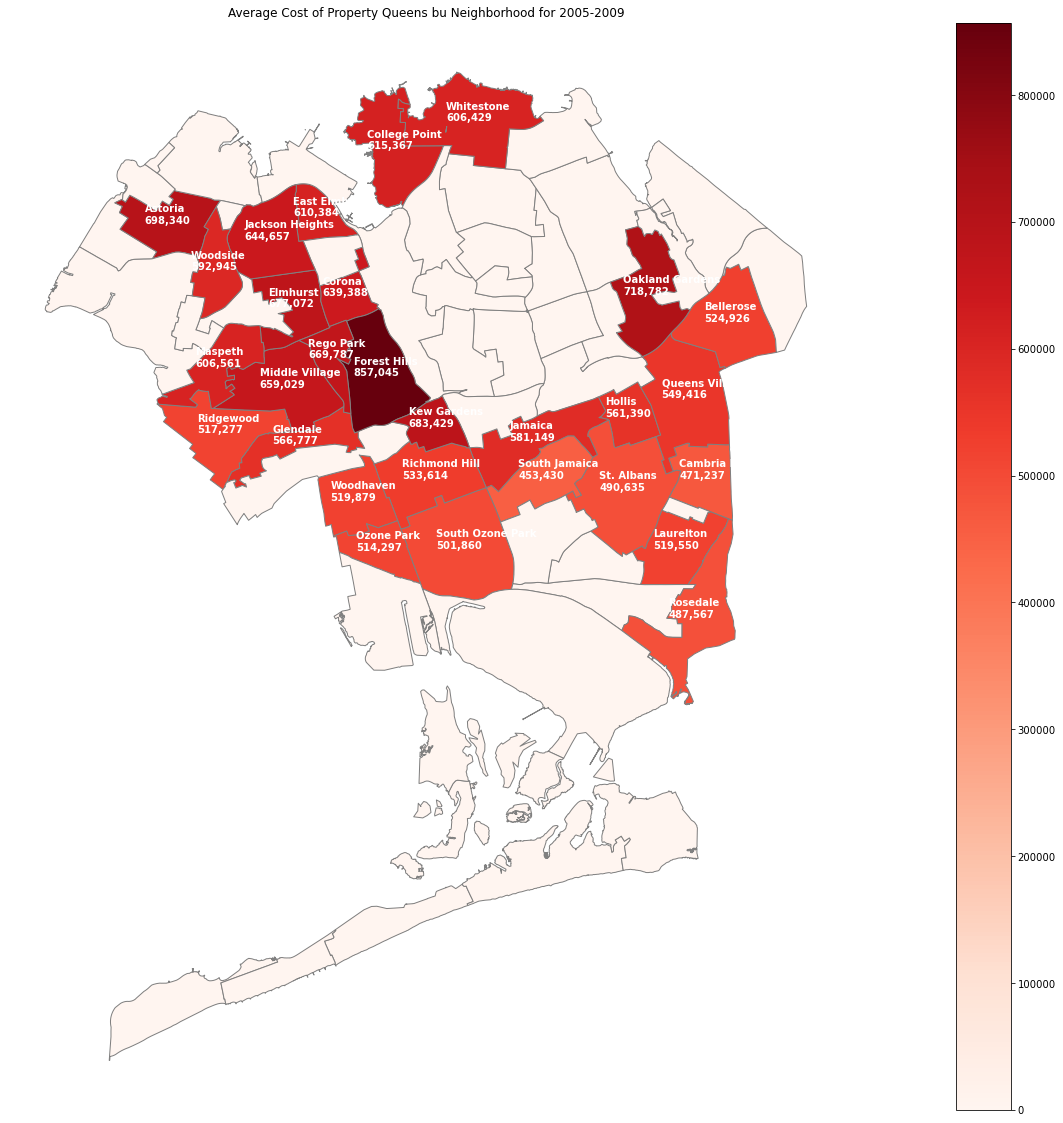

In [436]:
nb_data['cost'] = 0

for i, row in nb_data.iterrows():
    if row['NTAName'].upper() in sales_dict:
        nb_data.at[i, 'cost'] = average_cost_dict[row['NTAName'].upper()]

nb_cost = nb_data.plot(column='cost', k=8, cmap='Reds', figsize=(40,20), linewidth=1, edgecolor='0.5', legend=True)
   
for i, row in nb_data.iterrows():
    if row['NTAName'].upper() in average_cost_dict:
        x = row['geometry'].centroid.x
        y = row['geometry'].centroid.y
        formatter =  "{:,}".format((row['cost']))
        label = row['NTAName'] + "\n" + formatter
        nb_cost.annotate(label, xy=(x, y), xytext=(-25, 0), color="white", textcoords="offset points", fontsize=10, weight="bold")

nb_cost.set(title="Average Cost of Property Queens bu Neighborhood for 2005-2009")
nb_cost.set_axis_off()

### Tidy Up for Analysis
Now that we know values we want to look at, we further compress our data sets and prep them for analysis. Considering that the average sale prices were rather close to the median sale prices and which has their own benefits when it comes to countering bias, we should consider looking at them both. 

In [437]:
p2005['YEAR'] = 2005
p2006['YEAR'] = 2006
p2007['YEAR'] = 2007
p2008['YEAR'] = 2008
p2009['YEAR'] = 2009

frames = [p2005, p2006, p2007, p2008, p2009]
merged = pd.concat(frames)
merged = merged.drop(columns=["TYPE OF HOME", "NUMBER OF SALES", "LOWEST SALE PRICE", "HIGHEST SALE PRICE", "TOTAL NO. OF PROPERTIES"])

merged 

,NEIGHBORHOOD,AVERAGE SALE PRICE,MEDIAN SALE PRICE,YEAR
0,AIRPORT LA GUARDIA,445958.0,490000.0,2005
1,AIRPORT LA GUARDIA,507500.0,507500.0,2005
2,AIRPORT LA GUARDIA,745000.0,745000.0,2005
3,ARVERNE,305615.0,295000.0,2005
4,ARVERNE,414127.0,417500.0,2005
...,...,...,...,...
152,WOODHAVEN,399444.0,388760.0,2009
153,WOODHAVEN,473199.0,466000.0,2009
154,WOODSIDE,461782.0,485000.0,2009
155,WOODSIDE,608420.0,597500.0,2009


Below we get the intersection of neighborhoods from the property data set and the geo-mapping dataset and use it to create smaller data sets for each of the neighborhood so that we can plot them. 

In [438]:
nb_names = p2005['NEIGHBORHOOD'].unique()

df = merged

nb_data_names = []
temp = nb_data['NTAName'].unique()
for n in temp:
    nb_data_names.append(str(n).upper())

match = []
counter =  0
for n in nb_names:    
    if n in nb_data_names:
        match.append(n)
        locals()['df' + str(counter)] = df[(df.NEIGHBORHOOD == n)]
        counter += 1
        
df0 # 1 of 29 dataframes created from the intersection of property value and geo-mapping

,NEIGHBORHOOD,AVERAGE SALE PRICE,MEDIAN SALE PRICE,YEAR
6,ASTORIA,578771.0,564000.0,2005
7,ASTORIA,685243.0,670000.0,2005
8,ASTORIA,715707.0,740000.0,2005
5,ASTORIA,598629.0,567500.0,2006
6,ASTORIA,750228.0,749250.0,2006
7,ASTORIA,822494.0,830000.0,2006
4,ASTORIA,623038.0,601500.0,2007
5,ASTORIA,748302.0,755000.0,2007
6,ASTORIA,902231.0,898000.0,2007
5,ASTORIA,641873.0,582500.0,2008


Since we want to create a way to predict how likely a property would sale based on their general property value, we create a series of plots with regression lines as year vs average property value and then year vs medium property value. We notice that a majority of the data shows a negative line meaning that as years go by, the value of the property will decrease as well. This holds true for both the average property plots and medium value plots. In reality this doesn’t look promising for our prediction but let’s see where this goes. 

We save the predicted value of property in a dictionary so that we can again map the neighborhoods with its respective property cost like in the maps above.

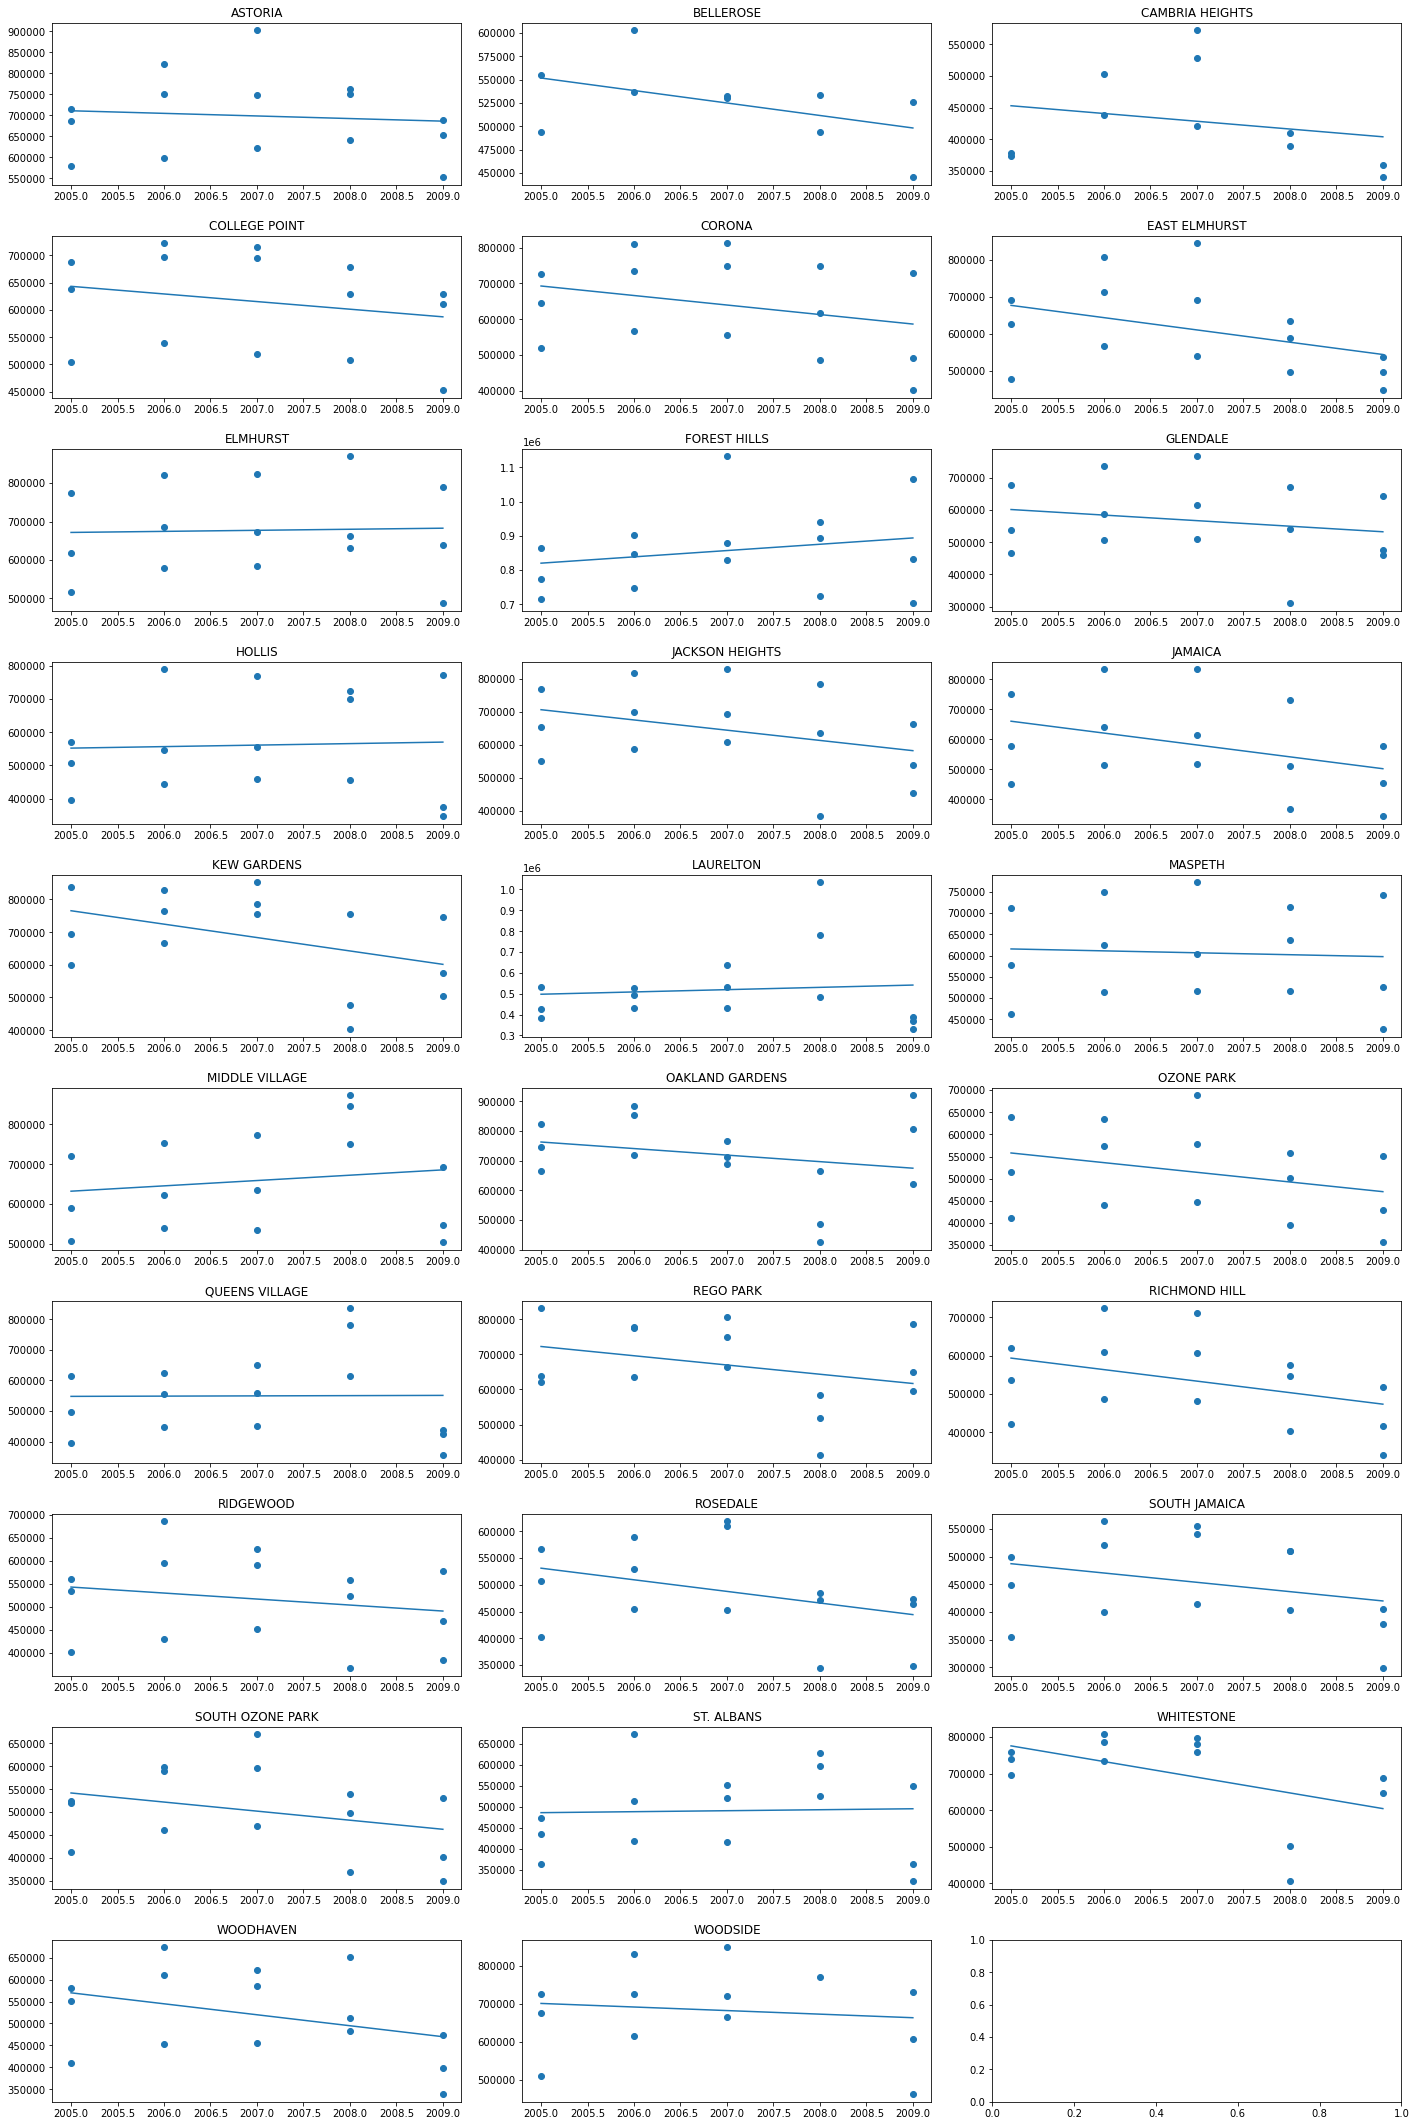

In [439]:
plt_row = 10
plt_col = 3

figure, ax = plt.subplots(nrows=plt_row, ncols=plt_col, figsize=(20,30))
figure.tight_layout(pad=3.0)

average_sales = {}
row_counter = 0 
col_counter = 0

for i in range(counter):
    x = locals()['df' + str(i)]['YEAR']
    y = locals()['df' + str(i)]['AVERAGE SALE PRICE']
    ax[row_counter][col_counter].scatter(x, y)
    ax[row_counter][col_counter].title.set_text(match[i])
    m, b = np.polyfit(x, y, 1)
    ax[row_counter][col_counter].plot(x, m * x + b)
    average_sales[match[i]] = (m*2021+b)
    
    if col_counter < (plt_col-1):
        col_counter += 1
    else:
        col_counter = 0
        row_counter += 1


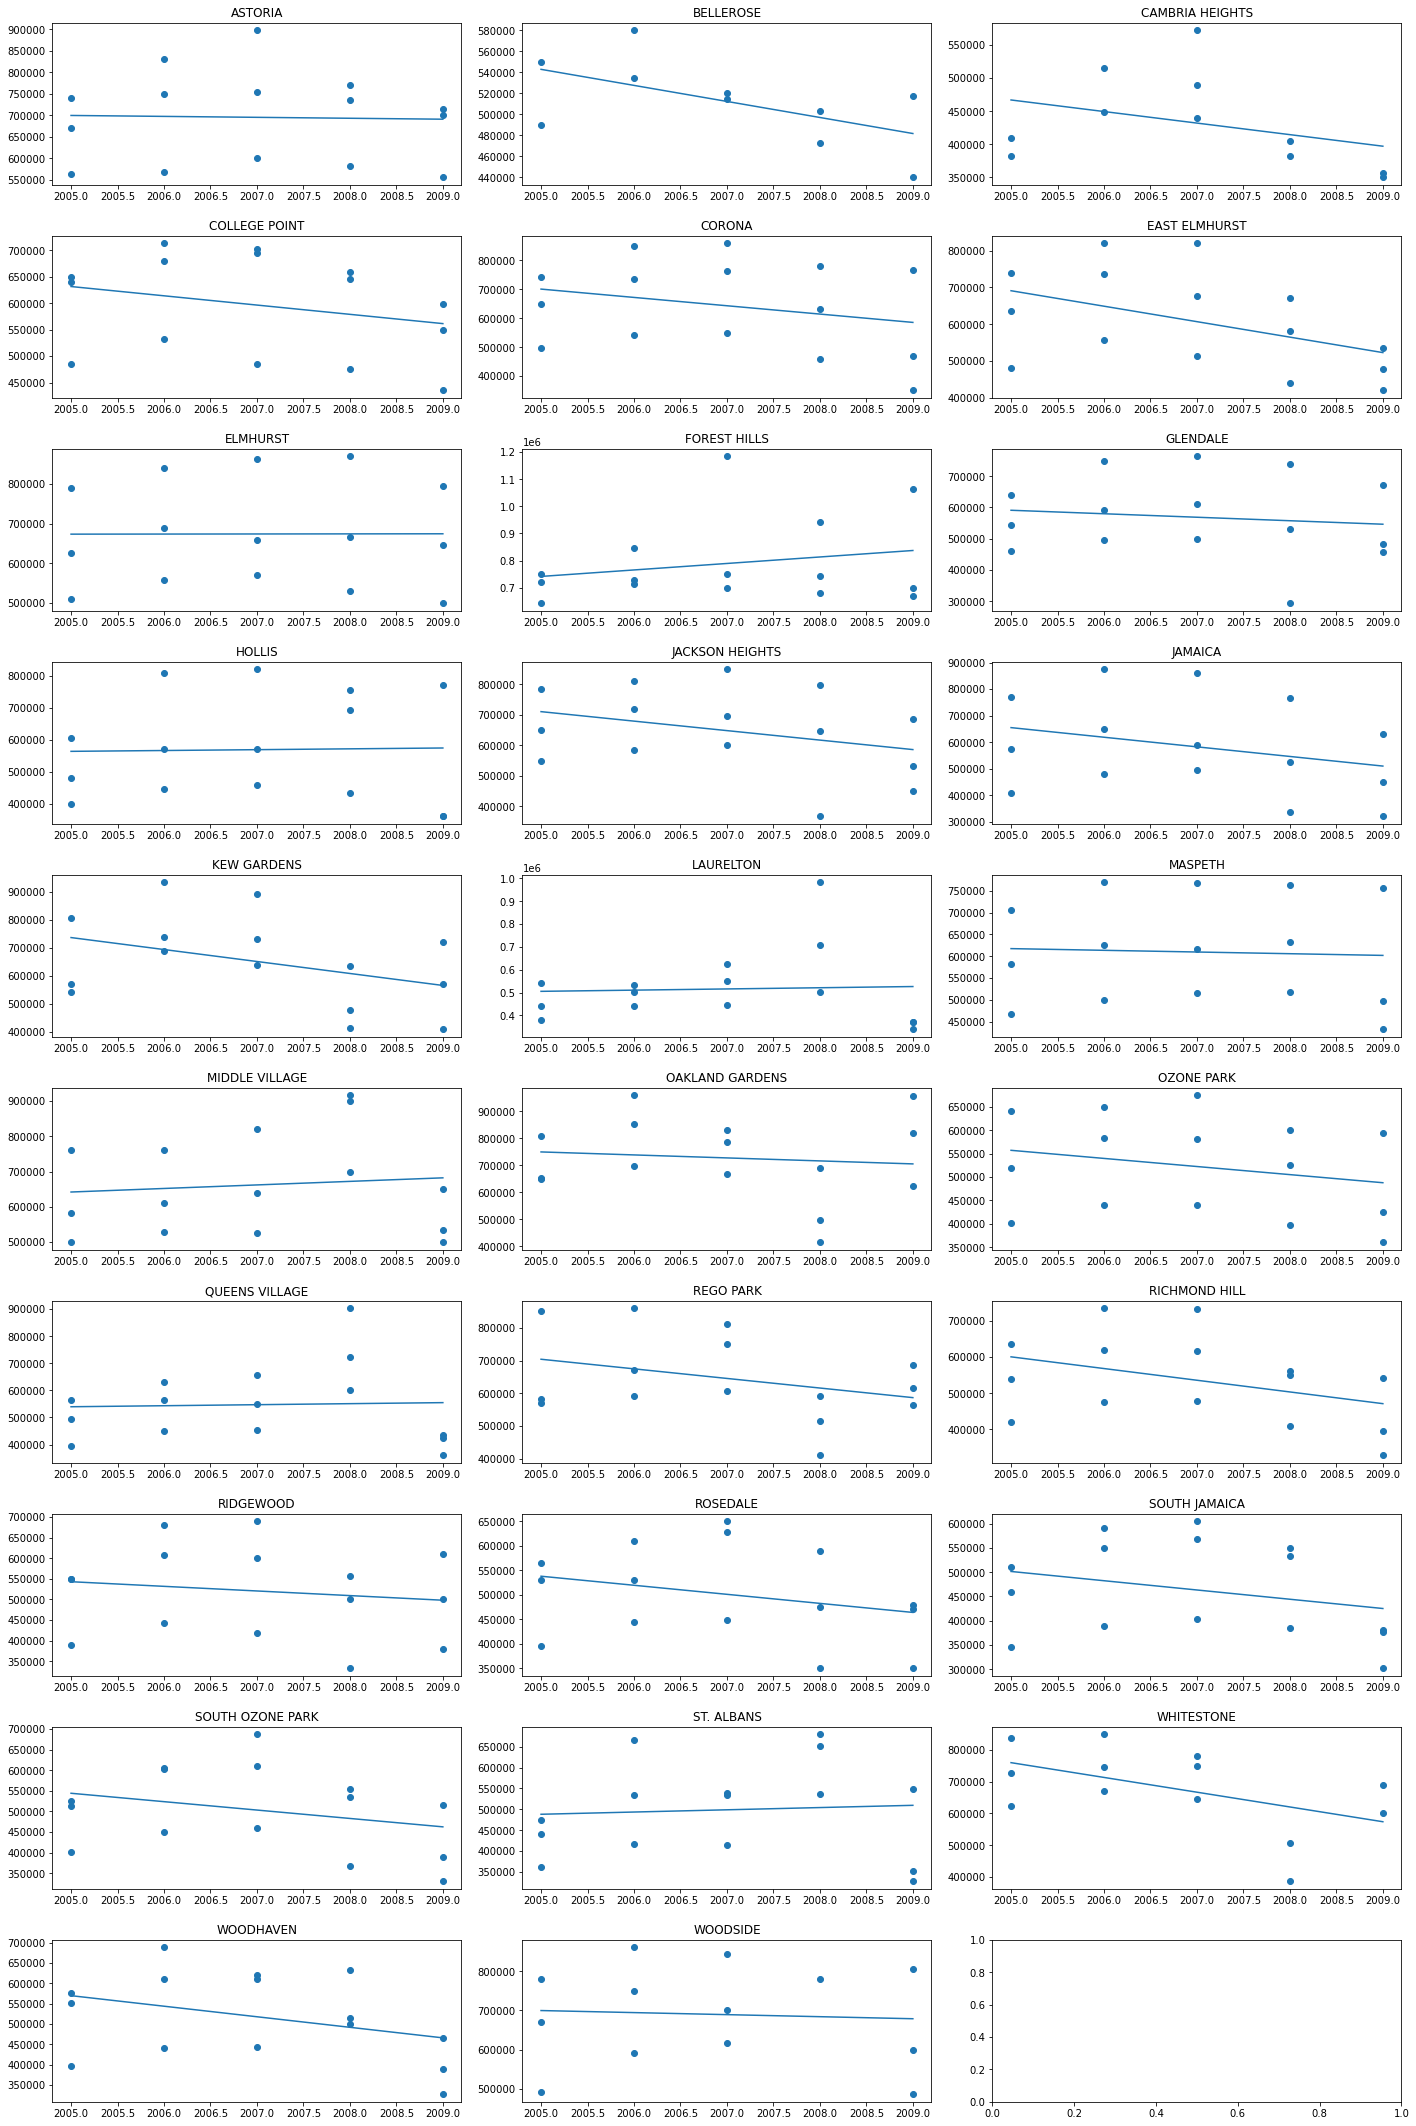

In [440]:
figurey, axy = plt.subplots(nrows=plt_row, ncols=plt_col, figsize=(20,30))
figurey.tight_layout(pad=3.0)

med_sales = {}
row_counter = 0 
col_counter = 0

for i in range(counter):
    x = locals()['df' + str(i)]['YEAR']
    y = locals()['df' + str(i)]['MEDIAN SALE PRICE']
    axy[row_counter][col_counter].scatter(x, y)
    axy[row_counter][col_counter].title.set_text(match[i])
    m, b = np.polyfit(x, y, 1)
    axy[row_counter][col_counter].plot(x, m * x + b)
    med_sales[match[i]] = (m*2021+b)
   
    if col_counter < (plt_col-1):
        col_counter += 1
    else:
        col_counter = 0
        row_counter += 1
        


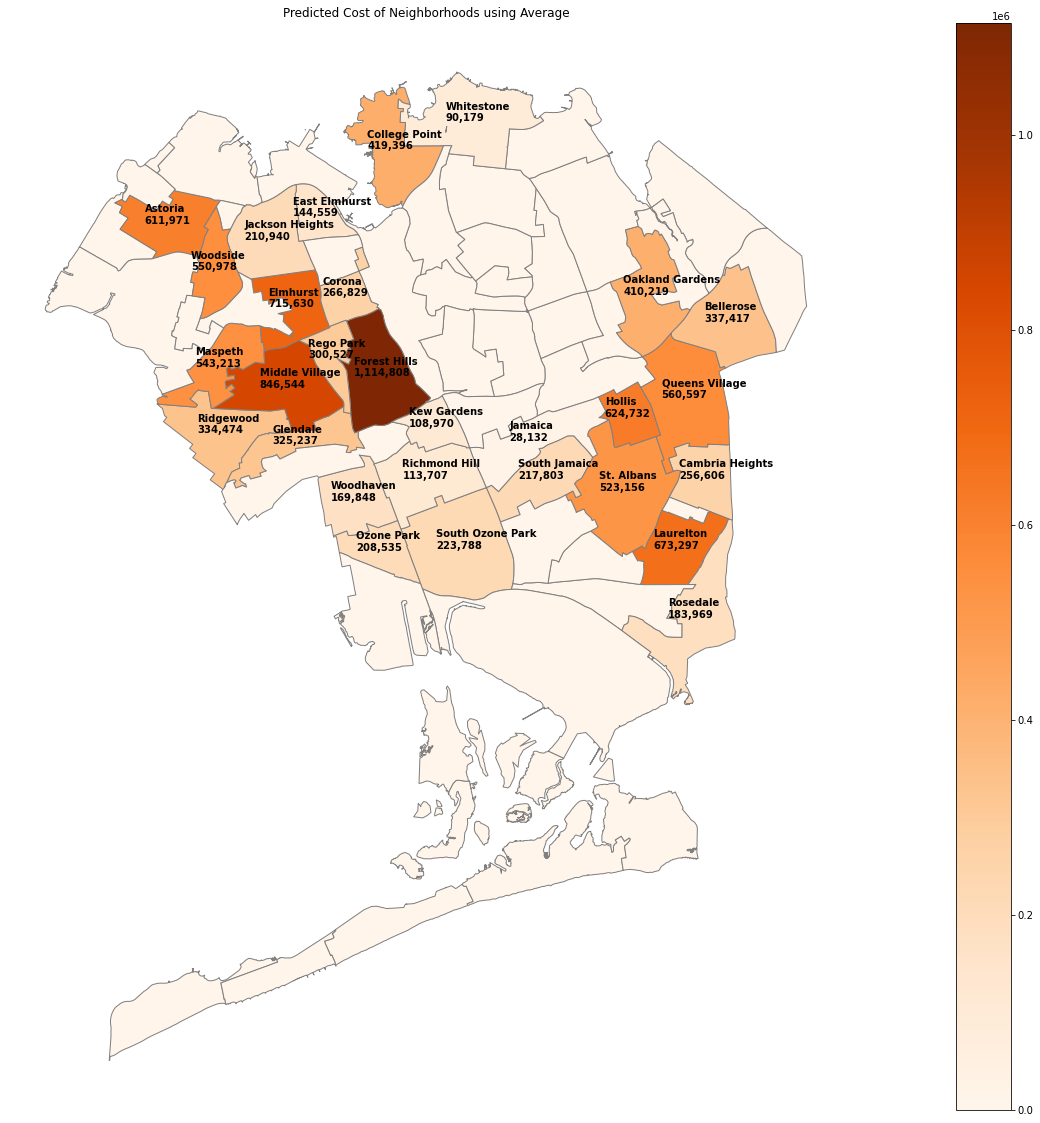

In [445]:
nb_data['P AVG SALES'] = 0

for i, row in nb_data.iterrows():
    if row['NTAName'].upper() in average_sales:
        nb_data.at[i, 'P AVG SALES'] = average_sales[row['NTAName'].upper()]
        
nb_avg_cost = nb_data.plot(column='P AVG SALES', k=8, cmap='Oranges', figsize=(40,20), linewidth=1, edgecolor='0.5', legend=True)
   
for i, row in nb_data.iterrows():
    if row['NTAName'].upper() in average_sales:
#         print(row['NTAName'].upper())
        
        x = row['geometry'].centroid.x
        y = row['geometry'].centroid.y
        formatter =  "{:,}".format((row['P AVG SALES']))
        label = row['NTAName'] + "\n" + formatter
        nb_avg_cost.annotate(label, xy=(x, y), xytext=(-25, 0), color="black", textcoords="offset points", fontsize=10, weight="bold")


nb_avg_cost.set(title="Predicted Cost of Neighborhoods using Average")
nb_avg_cost.set_axis_off()

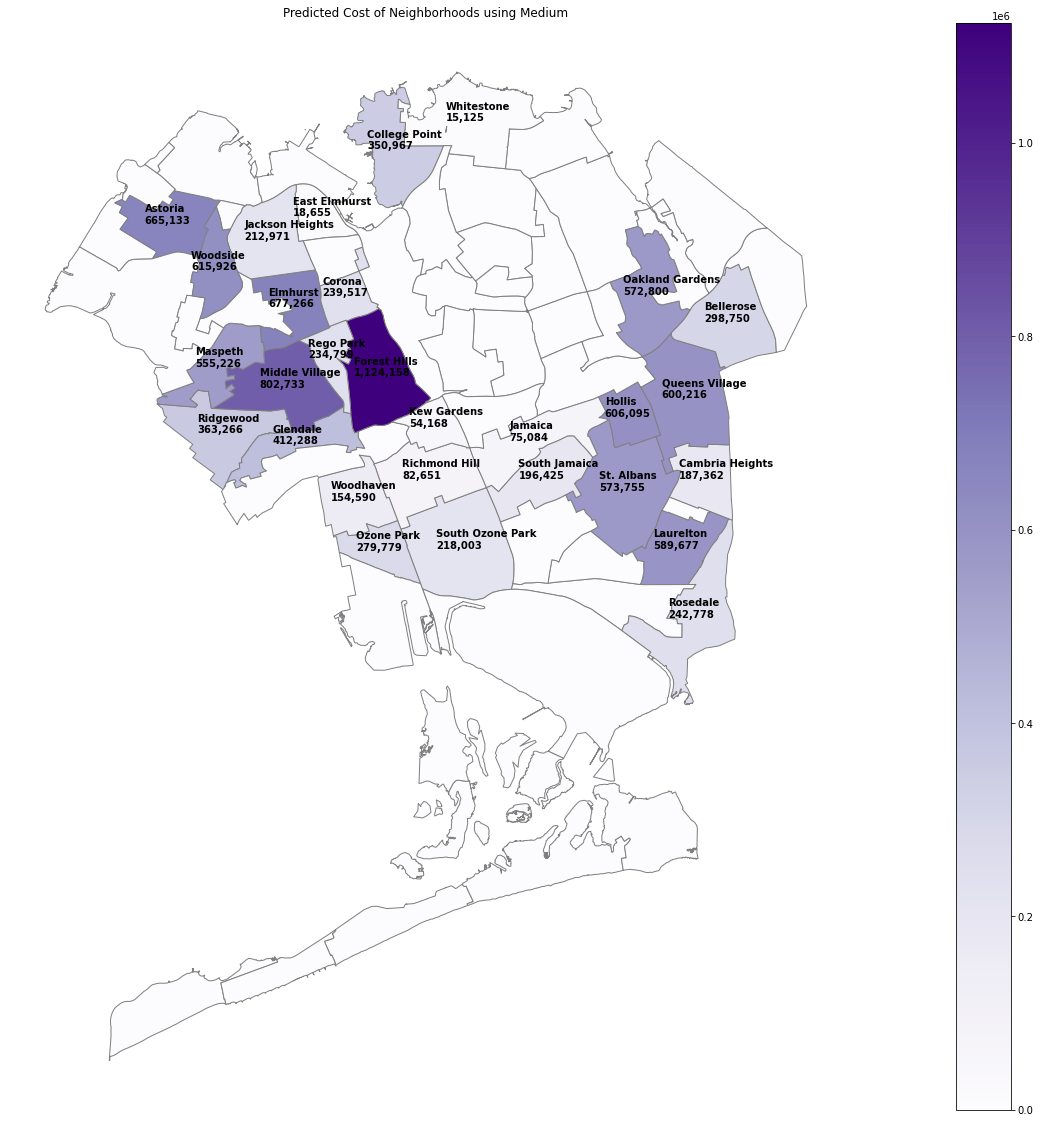

In [444]:
nb_data['P MED SALES'] = 0

for i, row in nb_data.iterrows():
    if row['NTAName'].upper() in med_sales:
        nb_data.at[i, 'P MED SALES'] = med_sales[row['NTAName'].upper()]
        
nb_med_cost = nb_data.plot(column='P MED SALES', k=8, cmap='Purples', figsize=(40,20), linewidth=1, edgecolor='0.5', legend=True)
   
for i, row in nb_data.iterrows():
    if row['NTAName'].upper() in average_sales:
#         print(row['NTAName'].upper())
        
        x = row['geometry'].centroid.x
        y = row['geometry'].centroid.y
        formatter =  "{:,}".format((row['P MED SALES']))
        label = row['NTAName'] + "\n" + formatter
        nb_med_cost.annotate(label, xy=(x, y), xytext=(-25, 0), color="black", textcoords="offset points", fontsize=10, weight="bold")


nb_med_cost.set(title="Predicted Cost of Neighborhoods using Medium")
nb_med_cost.set_axis_off()


In [ ]:
link = 'https://www.propertyshark.com/mason/market-trends/residential/nyc/queens/'
response = re.get(link)
site = bs(response.text, 'html.parser')

#scraping the data from specified id
table = site.find(id="nyc_nhoods_table");

temp = []
counter  = 0
for data in table.find_all('td'):
    if data.text != "Queens":
        if "$" in data.text:
            temp.append(data.text[1:])
        else:
            temp.append(data.text.upper())
            
name_med = {}
med = []

counter = 0
for t in temp:
    if counter % 2 == 0:
        name_med[t] = 0
    else:
        med.append(t)
    counter += 1
    
counter = 0
temp = name_med.keys()
for name in match:
    if name in temp:
        name_med[name] = float(med[counter].replace(',', ''))
    counter += 1

name_med = {k: v for k, v in name_med.items() if v != 0}

In [ ]:
nb_data['REAL'] = 0

for i, row in nb_data.iterrows():
    if row['NTAName'].upper() in name_med:
        nb_data.at[i, 'REAL'] = name_med[row['NTAName'].upper()]
        
nb_real_cost = nb_data.plot(column='REAL', k=8, cmap='Blues', figsize=(40,20), linewidth=1, edgecolor='0.5', legend=True)
   
for i, row in nb_data.iterrows():
    if row['NTAName'].upper() in name_med:
#         print(row['NTAName'].upper())
        
        x = row['geometry'].centroid.x
        y = row['geometry'].centroid.y
        formatter =  "{:,}".format((row['REAL']))
        label = row['NTAName'] + "\n" + formatter
        nb_real_cost.annotate(label, xy=(x, y), xytext=(-25, 0), color="white", textcoords="offset points", fontsize=10, weight="bold")


nb_real_cost.set(title="General Cost of Neighborhoods in Queens, NY in 2021")
nb_real_cost.set_axis_off(

Goal Compare property value throughout the years
- see where most places has people moving in and out (look at number of sales)
- see which place is most expensive (look at average sell price)
- see which place is on the rise (look at median sale price)
- see if we can get data from those years to predict current prices (do regression fit line, year to amount - use median sale)

source file:
property values - https://catalog.data.gov/dataset?q=Summary+of+Neighborhood+Sales+for+Queens&as_sfid=AAAAAAX1aTcL_dTLlWLD69I2ZrQhG5DeLLi-Rciu0eK3gTdzSTTd9zcm9YypC4hbJTs_BBHFR4LKlxINv8KvGv2thiC3_qaEyhYdozu40X7vkjoxL5wHk8a6gdWOjky49KUKvDg%3D&as_fid=b9d75d678b79b72a1d8bb9d04356231f210c5ac0 (2005 and 2009)

neighborhood shape files - https://www1.nyc.gov/site/planning/data-maps/open-data/bytes-archive.page?sorts[year]=0&queries[search]=Neighborhood (Neighborhood Tabulation Areas - Shapefile 2020, 20A)

https://www.bloomberg.com/graphics/property-prices/nyc/
supposed medium cost of proptery in Queens in 2021 - https://www.propertyshark.com/mason/market-trends/residential/nyc/queens/